In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
train_data=pd.read_csv(r"train_hr.csv")
test_data=pd.read_csv(r"test_hr.csv")

In [3]:
test_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [4]:
train_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [5]:
print("Train data shape is: ",train_data.shape)
print("Test data shape is:  ",test_data.shape)

Train data shape is:  (54808, 14)
Test data shape is:   (23490, 13)


In [6]:
test_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [7]:
train_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [8]:
# understanding the value counts to train the model much more accurately.
train_data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [9]:
train_data['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [10]:
# understanding the decription of object or categorical columns
train_data.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


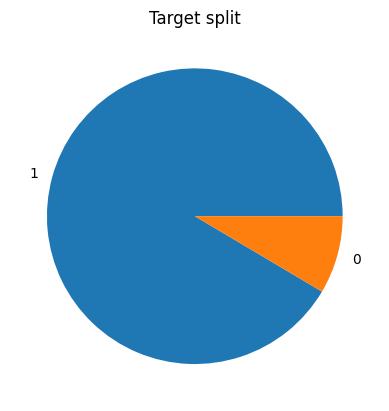

In [11]:
plt.pie( train_data['is_promoted'].value_counts(), labels=['1','0'])
plt.title("Target split")
plt.show()

In [12]:
# checking for null values
train_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
test_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [14]:
# filling in the missing values
train_data['education']=train_data['education'].fillna(train_data['education'].mode()[0])
train_data['previous_year_rating']=train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].mode()[0])

In [15]:
train_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [16]:
test_data['education']=test_data['education'].fillna(test_data['education'].mode()[0])
test_data['previous_year_rating']=test_data['previous_year_rating'].fillna(test_data['previous_year_rating'].mode()[0])

In [17]:
test_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

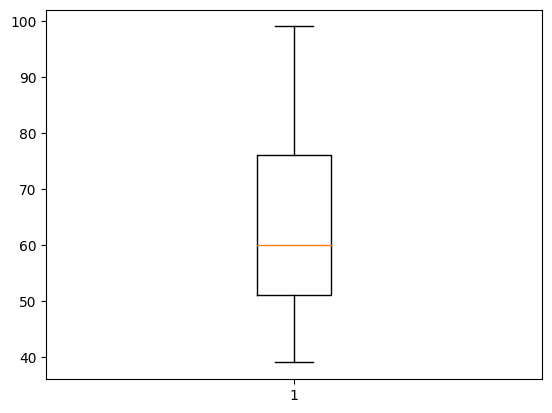

In [18]:
# checking for outliers
plt.boxplot(train_data['avg_training_score'])
plt.show()

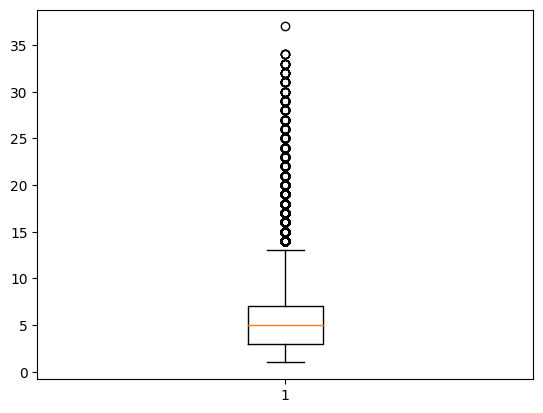

In [19]:
plt.boxplot(train_data['length_of_service'])
plt.show()

In [20]:
# reducing the outliers
train_data=train_data[train_data['length_of_service']>13]

Text(0.5, 1.0, 'KPIs Understanding')

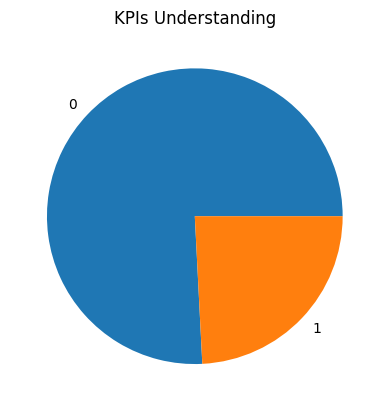

In [21]:
# univariate understandings
plt.pie(train_data['KPIs_met >80%'].value_counts(),labels=[0,1])
plt.title('KPIs Understanding')

Text(0.5, 1.0, 'previous year ratings Understanding')

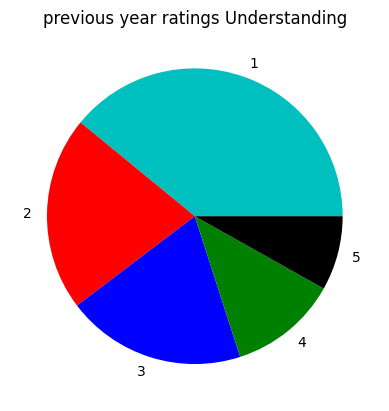

In [22]:
plt.pie(train_data['previous_year_rating'].value_counts(),colors=['c','r','b','g','black'], labels=['1','2','3','4','5'])
plt.title('previous year ratings Understanding')

Text(0.5, 1.0, 'awards won Understanding')

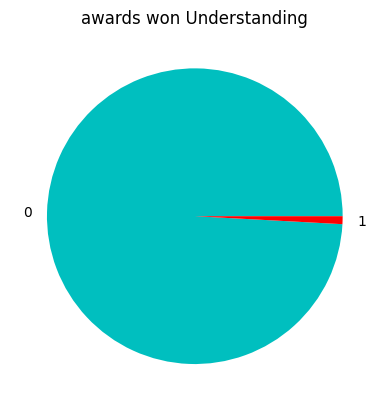

In [23]:
plt.pie(train_data['awards_won?'].value_counts(),colors=['c','r'], labels=['0','1'])
plt.title('awards won Understanding')

Text(0.5, 1.0, 'gender understanding')

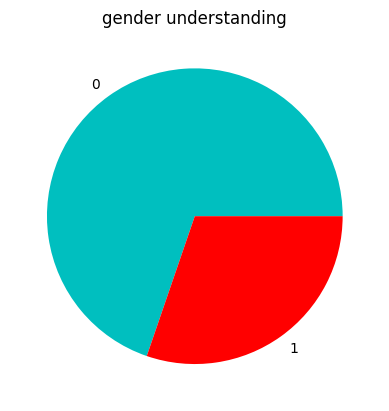

In [24]:
plt.pie(train_data['gender'].value_counts(),colors=['c','r'], labels=['0','1'])
plt.title('gender understanding')

Text(0.5, 1.0, 'education understanding')

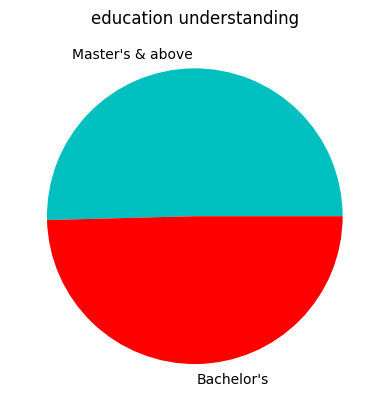

In [25]:
plt.pie(train_data['education'].value_counts(),colors=['c','r','b'], labels=train_data['education'].value_counts().index)
plt.title('education understanding')

Text(0.5, 1.0, 'recruitment channel understanding')

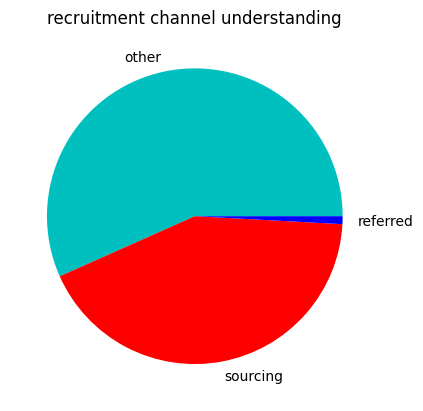

In [26]:
plt.pie(train_data['recruitment_channel'].value_counts(),colors=['c','r','b'], labels=train_data['recruitment_channel'].value_counts().index)
plt.title('recruitment channel understanding')

Text(0.5, 1.0, 'training distribution')

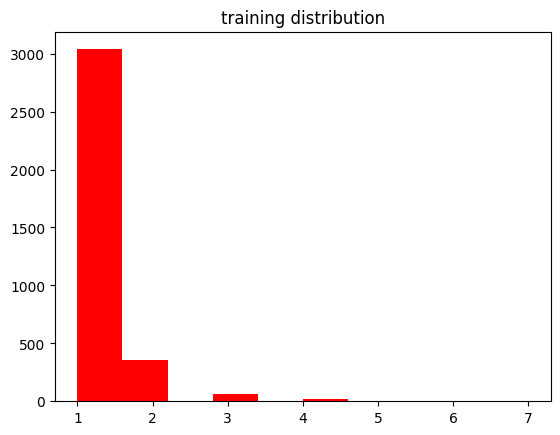

In [27]:
plt.hist(train_data['no_of_trainings'],color='red')
plt.title('training distribution')

Text(0.5, 1.0, 'age distribution')

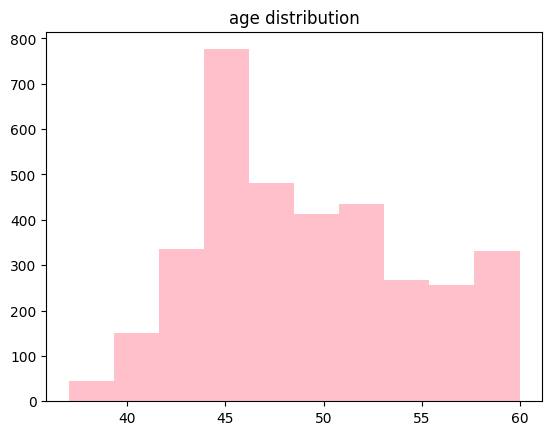

In [28]:
plt.hist(train_data['age'],color='pink')
plt.title('age distribution')

Text(0.5, 1.0, 'department distribution')

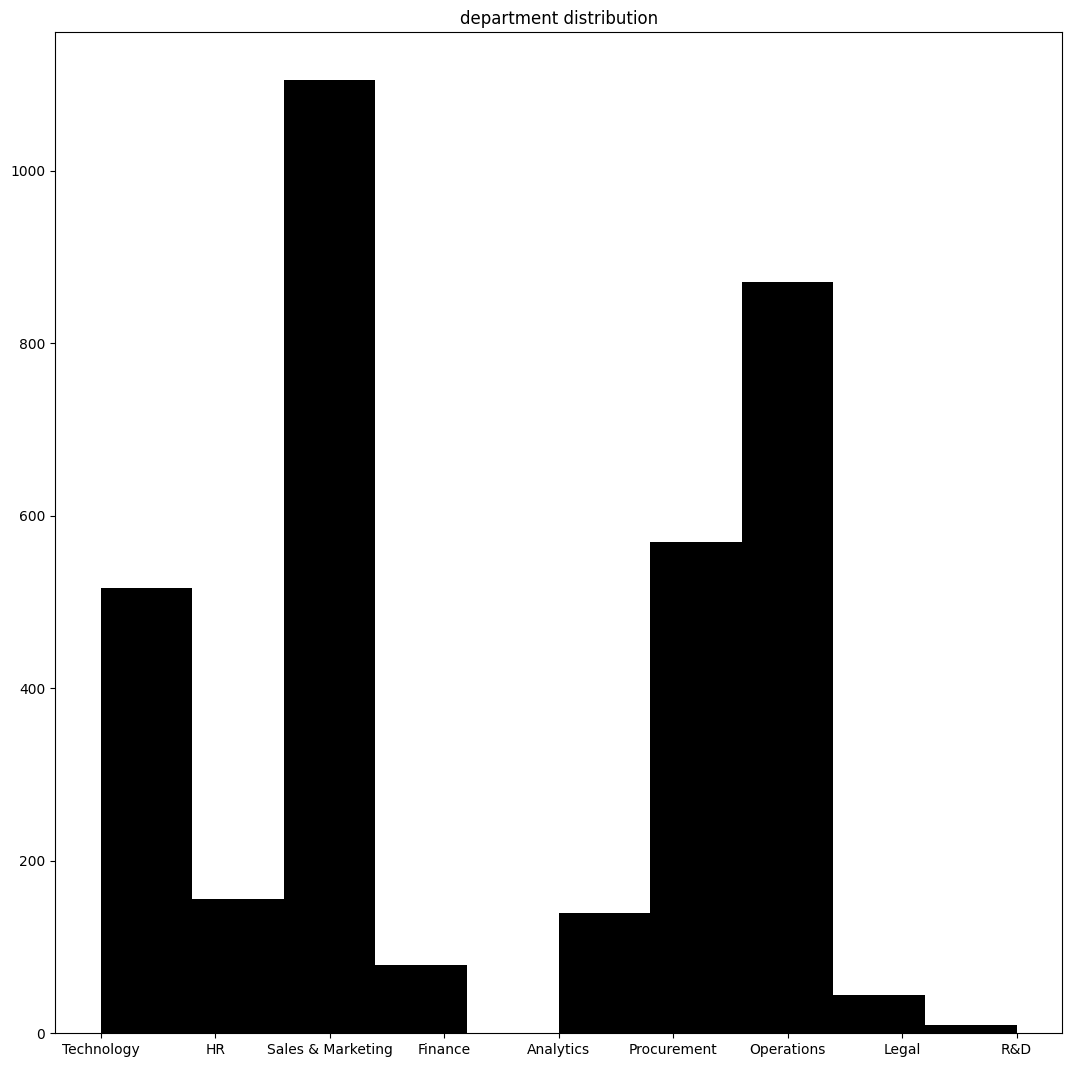

In [29]:
plt.figure(figsize=(13,13))
plt.hist(train_data['department'],color='black')
plt.title('department distribution')

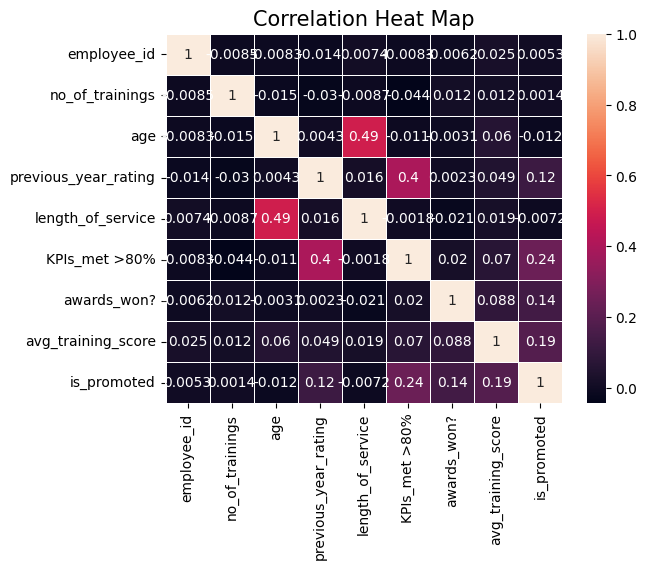

In [30]:
sns.heatmap(train_data.corr(), annot = True, linewidth = 0.5)
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [31]:
# adding columns for better predictions
train_data['performance level'] = train_data['awards_won?']+train_data['KPIs_met >80%'] + train_data['previous_year_rating']
test_data['performance level'] = test_data['awards_won?']+test_data['KPIs_met >80%'] + test_data['previous_year_rating']


train_data['final_training_score'] = train_data['avg_training_score'] * train_data['no_of_trainings']
test_data['final_training_score'] = test_data['avg_training_score'] * test_data['no_of_trainings']

In [32]:
# dropping unnecessary columns
train_data = train_data.drop(['recruitment_channel', 'region','employee_id' ], axis = 1)
test_data = test_data.drop(['recruitment_channel', 'region','employee_id'], axis = 1)


In [33]:
train_data.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,performance level,final_training_score
13,Technology,Master's & above,m,2,39,3.0,16,0,0,80,0,3.0,160
42,HR,Bachelor's,m,1,59,4.0,26,1,0,52,0,5.0,52
60,Sales & Marketing,Master's & above,m,1,50,4.0,17,1,0,47,1,5.0,47
74,Sales & Marketing,Bachelor's,m,1,50,3.0,14,0,0,52,0,3.0,52
99,Finance,Master's & above,m,1,60,5.0,17,0,0,59,0,5.0,59


In [34]:
test_data.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,performance level,final_training_score
0,Technology,Bachelor's,m,1,24,3.0,1,1,0,77,4.0,77
1,HR,Bachelor's,f,1,31,3.0,5,0,0,51,3.0,51
2,Sales & Marketing,Bachelor's,m,1,31,1.0,4,0,0,47,1.0,47
3,Procurement,Bachelor's,f,3,31,2.0,9,0,0,65,2.0,195
4,Finance,Bachelor's,m,1,30,4.0,7,0,0,61,4.0,61


In [35]:
# checking for employee who have not achieved 80+kpi, no award and less than 60 avg traioning score
train_data[(train_data['KPIs_met >80%'] == 0) & (train_data['previous_year_rating'] == 1.0) & 
      (train_data['awards_won?'] == 0) & (train_data['avg_training_score'] < 60) & (train_data['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,performance level,final_training_score


In [36]:
# dropping the above unnecessary columns
train_data = train_data.drop(train_data[(train_data['KPIs_met >80%'] == 0) & (train_data['previous_year_rating'] == 1.0) & 
      (train_data['awards_won?'] == 0) & (train_data['avg_training_score'] < 60) & (train_data['is_promoted'] == 1)].index)


In [37]:
train_data.dtypes

department               object
education                object
gender                   object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
performance level       float64
final_training_score      int64
dtype: object

In [38]:
# converting categoring to numerical
train_data['education'] = train_data['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test_data['education'] = test_data['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))


In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['department'] = le.fit_transform(train_data['department'])
test_data['department'] = le.fit_transform(test_data['department'])
train_data['gender'] = le.fit_transform(train_data['gender'])
test_data['gender'] = le.fit_transform(test_data['gender'])

In [40]:
train_data.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,performance level,final_training_score
13,8,3,1,2,39,3.0,16,0,0,80,0,3.0,160
42,2,2,1,1,59,4.0,26,1,0,52,0,5.0,52
60,7,3,1,1,50,4.0,17,1,0,47,1,5.0,47
74,7,2,1,1,50,3.0,14,0,0,52,0,3.0,52
99,1,3,1,1,60,5.0,17,0,0,59,0,5.0,59


In [76]:
y = train_data['is_promoted']
x = train_data.drop(['is_promoted'], axis = 1)
X_test = test_data

In [ ]:
pip install imbalanced-learn

In [78]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(6510, 12)
(6510,)


In [79]:
print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    3255
1     234
Name: is_promoted, dtype: int64
After Resampling :
0    3255
1    3255
Name: 0, dtype: int64


In [80]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [81]:
print(x)

[[ 1.23229953  0.99172242  0.6588111  ...  1.45960925 -0.37921231
   2.48924895]
 [-1.5910515  -1.00834667  0.6588111  ... -0.81989561  0.99255727
  -0.58641432]
 [ 0.76174102  0.99172242  0.6588111  ... -1.22695005  0.99255727
  -0.72880613]
 ...
 [ 0.76174102 -1.00834667  0.6588111  ... -0.98271738  0.99255727
  -0.64337104]
 [ 1.23229953 -1.00834667 -1.51788579 ...  1.37819836 -0.37921231
   0.1825015 ]
 [ 1.23229953 -1.00834667  0.6588111  ...  1.29678748 -0.37921231
   0.15402314]]


In [82]:
from sklearn.model_selection import train_test_split
# split the data into test and train
x_train,x_test, y_train, y_test=train_test_split(x_resample,y_resample,test_size=0.3,random_state=10)


In [83]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4557, 12)
(4557, 1)
(1953, 12)
(1953, 1)


In [84]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [85]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier(random_state=10)

# fit the model on data and predict the values

model_DecisionTree.fit(x_train,y_train)

y_pred=model_DecisionTree.predict(x_test)
print(list(zip(y_test,y_pred)))



[(0, 1)]


In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ')
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[936  54]
 [ 42 921]]
classification report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       990
           1       0.94      0.96      0.95       963

    accuracy                           0.95      1953
   macro avg       0.95      0.95      0.95      1953
weighted avg       0.95      0.95      0.95      1953

accuracy of the model:  0.9508448540706606


In [87]:
# using logistic regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [88]:
y_pred1=log.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred1)
print(cfm)

print('classification report: ')
print(classification_report(y_test,y_pred1))

acc=accuracy_score(y_test,y_pred1)
print('accuracy of the model: ',acc)

[[766 224]
 [241 722]]
classification report: 
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       990
           1       0.76      0.75      0.76       963

    accuracy                           0.76      1953
   macro avg       0.76      0.76      0.76      1953
weighted avg       0.76      0.76      0.76      1953

accuracy of the model:  0.7619047619047619


In [89]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
y_pred3=rf.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred3)
print(cfm)

print('classification report: ')
print(classification_report(y_test,y_pred3))

acc=accuracy_score(y_test,y_pred3)
print('accuracy of the model: ',acc)

[[955  35]
 [ 22 941]]
classification report: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       990
           1       0.96      0.98      0.97       963

    accuracy                           0.97      1953
   macro avg       0.97      0.97      0.97      1953
weighted avg       0.97      0.97      0.97      1953

accuracy of the model:  0.9708141321044547


In [91]:
y_pred3

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [92]:
# best model according to f1score is random forest classifier


In [93]:
from sklearn.ensemble import ExtraTreesClassifier
model_ExtraTrees=ExtraTreesClassifier(n_estimators=100,random_state=10)
# fit the model in the data and predict the values

model_ExtraTrees.fit(x_train,y_train)
y_pred=model_ExtraTrees.predict(x_test)

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ')
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[927  63]
 [ 38 925]]
classification report: 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       990
           1       0.94      0.96      0.95       963

    accuracy                           0.95      1953
   macro avg       0.95      0.95      0.95      1953
weighted avg       0.95      0.95      0.95      1953

accuracy of the model:  0.9482846902201741


In [97]:
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10), n_estimators=100,random_state=10)


# fit the model in the data and predict the values

model_AdaBoost.fit(x_train,y_train)
y_pred=model_AdaBoost.predict(x_test)


In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ')
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[927  63]
 [ 38 925]]
classification report: 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       990
           1       0.94      0.96      0.95       963

    accuracy                           0.95      1953
   macro avg       0.95      0.95      0.95      1953
weighted avg       0.95      0.95      0.95      1953

accuracy of the model:  0.9482846902201741


In [99]:
from sklearn.ensemble import GradientBoostingClassifier
model_GradientBoosting=GradientBoostingClassifier(n_estimators=100,random_state=10)
# fit the model in the data and predict the values

model_GradientBoosting.fit(x_train,y_train)
y_pred=model_GradientBoosting.predict(x_test)

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ')
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[914  76]
 [ 53 910]]
classification report: 
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       990
           1       0.92      0.94      0.93       963

    accuracy                           0.93      1953
   macro avg       0.93      0.93      0.93      1953
weighted avg       0.93      0.93      0.93      1953

accuracy of the model:  0.9339477726574501


In [101]:
from xgboost import XGBClassifier
model_XGB=XGBClassifier(n_estimators=100,random_state=10)
# fit the model in the data and predict the values

model_XGB.fit(x_train,y_train)
y_pred=model_XGB.predict(x_test)

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ')
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[946  44]
 [ 22 941]]
classification report: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       990
           1       0.96      0.98      0.97       963

    accuracy                           0.97      1953
   macro avg       0.97      0.97      0.97      1953
weighted avg       0.97      0.97      0.97      1953

accuracy of the model:  0.9662058371735791


In [103]:
# on the basis of the f1 score the random forest classifier is the best, hence would proceed with it further.

In [104]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [105]:
# store the predicted probabilities
y_pred_prob=rf.predict(X_test)
print(y_pred_prob)

[1 0 0 ... 0 0 1]


In [106]:
y_pred_prob

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [107]:
y_pred_prob=pd.DataFrame(y_pred_prob)

In [108]:
# converting into excel file
y_pred_prob.to_excel(r'promotion.xlsx',index=True)